In [162]:
#Importing necessary modules
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

The Original Image:


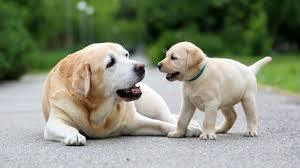

In [163]:
#Showing the original image
img=cv2.imread("3.jpg")
print("The Original Image:")
cv2_imshow(img)

In [164]:
#Finding the dimensions of the Image
h,w=img.shape[0:2]

# **Nosing the original Image**




The Noised Image


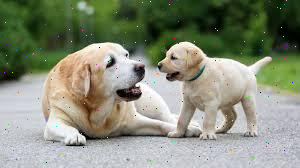

Your image has been 4.67% noised


In [165]:
#Noising the Image
import random
#Calculating the percent of noise required in the image
percent = random.randint(400,500)/10000
noise = int(((h)*(w)*percent)/10)
#Noising the image randomnly at position (x,y)
for i in range(noise):
  x=int(random.random()*(h-1))
  y=int(random.random()*(w-1))
  img[x,y]=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
  #Finally showing the image and printing , the percentage noised
print("The Noised Image")
cv2_imshow(img)
print("Your image has been "+"{:.2f}".format(percent*100) +"% noised")

Noised image has been successfully saved as 'Noised_Image.jpg'
The save Noised Image is:


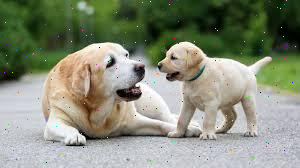

In [166]:
#Saving the noised image
if cv2.imwrite("Noised_Image.jpg",img):
  print("Noised image has been successfully saved as 'Noised_Image.jpg'")
  print("The save Noised Image is:")
  cv2_imshow(img)
else:
  print("Sorry!Your image couldn't be saved. Please try again")

# **Denosing The Noised Image**

The Noised Image is: 


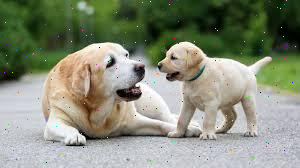



The De-Noised Image(Comparing with Mean) is:


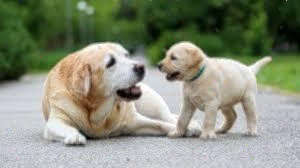



The De-Noised Image(Comparing with Median) is:


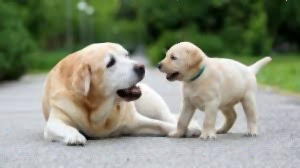

In [167]:
#Denoising the image
#Creating three variable,copying the pixels of our noisy image
#Reading the Noisy Image
noised_img = cv2.imread("Noised_Image.jpg")
denoised_img_median= cv2.imread("Noised_Image.jpg")
denoised_img_mean = cv2.imread("Noised_Image.jpg")
c=0
#Cheking if any noisy pixels are present in the borders
for l in range(0,h):
    for b in range(0,w):
      for t in range(3): 
        if l==0 and b>=1 and b<=h-2:
          c=1
          k=[noised_img[l+1,b+1,t],
                  noised_img[l+1,b-1,t],
                  noised_img[l,b+1,t],
                  noised_img[l+1,b,t],
                  noised_img[l,b-1,t]
            ]
        if b==0 and l>=1 and l<=h-2:
          c=1
          k=[noised_img[l+1,b+1,t],
                  noised_img[l-1,b+1,t],
                  noised_img[l,b+1,t],
                  noised_img[l+1,b,t],
                  noised_img[l-1,b,t],
                  ]
          
        if l==h-1 and b>=1 and b<=h-2:
          c=1
          k=[noised_img[l-1,b-1,t],
                  noised_img[l-1,b+1,t],
                  noised_img[l,b+1,t],
                  noised_img[l-1,b,t],
                  noised_img[l,b-1,t]
                  ]
        if b==w-1 and l>=1 and l<=h-2:
          c=1
          k=[noised_img[l-1,b-1,t],
                  noised_img[l+1,b-1,t],
                  noised_img[l+1,b,t],
                  noised_img[l-1,b,t],
                  noised_img[l,b-1,t]
                  ]
#Checking the corners for any noisy pixels
          if b==0 and l==0:
            c=1
            k=[noised_img[l+1,b+1,t],
                noised_img[l,b+1,t],
                noised_img[l+1,b,t],
                ]
          if b==0 and l==h-1:
             c=1
             k=[noised_img[l-1,b+1,t],
                noised_img[l,b+1,t],
                noised_img[l-1,b,t],
               ]
          if b==h-1 and l==0:
            c=1
            k=[noised_img[l+1,b-1,t],
              noised_img[l+1,b,t],
              noised_img[l,b-1,t],
              ]
          if b==h-1 and l==h-1:
            c=1
            k=[noised_img[l-1,b-1,t],
              noised_img[l-1,b,t],
              noised_img[l,b-1,t],
              ]
#Finally checking if noisy pixels present or not, if present equating to the corresponding measure(mean/median)
        if (c==1):
          mean_pixel=np.mean(k)
          median_pixel=np.median(k)
          if (abs(noised_img[l,b,t]-median_pixel)>2):
                  denoised_img_median[l,b,t]=median_pixel
          if (abs(noised_img[l,b,t]-mean_pixel)>20):
                  denoised_img_mean[l,b,t]=mean_pixel
        c=0
          

#Finding the median of neighbouring 8-pixels (except at the boundaries)
for l in range(1,h-1):
    for b in range(1,w-1):
      for t in range(3):
        k=[noised_img[l+1,b+1,t],
                  noised_img[l-1,b-1,t],
                  noised_img[l-1,b+1,t],
                  noised_img[l+1,b-1,t],
                  noised_img[l,b+1,t],
                  noised_img[l+1,b,t],
                  noised_img[l-1,b,t],
                  noised_img[l,b-1,t],
                  ]
        median_pixel=np.median(k)
        mean_pixel=np.mean(k)
#Finally checking if noisy pixels present or not, if present equating to the corresponding measure(mean/median)
        if (abs(noised_img[l,b,t]-median_pixel)>2):
            denoised_img_median[l,b,t]=median_pixel
        if (abs(noised_img[l,b,t]-mean_pixel)>20):
            denoised_img_mean[l,b,t]=mean_pixel
#Displaying the noised image
print('The Noised Image is: ')
cv2_imshow(img)
print("\n")
#Desplaying the denoised image(done using mean)
print("The De-Noised Image(Comparing with Mean) is:")
cv2_imshow(denoised_img_mean)
print("\n")
#Desplaying the denoised image(done using median)
print("The De-Noised Image(Comparing with Median) is:")
cv2_imshow(denoised_img_median)

Denoised image(Using Mean) has been successfully saved as 'Denoised_Image_Mean.jpg'
The saved denoised image using mean:


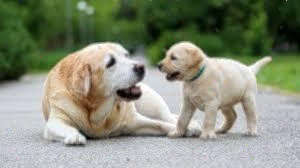



Denoised image(Using Median) has been successfully saved as 'Denoised_Image_Mean.jpg'
The saved denoised image using median:


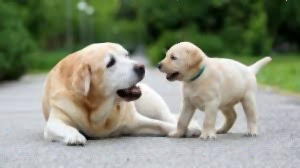

In [168]:
#Saving the denoised image
#Saving the denoised image (that has been denoised using mean)
if cv2.imwrite("Denoised_Image_Mean.jpg",denoised_img_mean):
  print("Denoised image(Using Mean) has been successfully saved as 'Denoised_Image_Mean.jpg'")
#Displaying the saved denoised image(de-noised using mean)
  print("The saved denoised image using mean:")
  cv2_imshow(denoised_img_mean)
  print("\n")
else:
  print("Sorry!Your image couldn't be saved. Please try again")
#Saving the denoised image (that has been denoised using median)
if cv2.imwrite("Denoised_Image_Median.jpg",denoised_img_median):
  print("Denoised image(Using Median) has been successfully saved as 'Denoised_Image_Mean.jpg'")
#Displaying the saved denoised image(de-noised using mean)
  print("The saved denoised image using median:")
  cv2_imshow(denoised_img_median)
else:
  print("Sorry!Your image couldn't be saved. Please try again")